In [1]:
import os
import math
import time
import struct
import json
import pandas as pd
import networkx as nx
import numpy as np
import numpy.linalg as npla
import scipy
import scipy.sparse.linalg as spla
from scipy import sparse
from scipy import linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib tk

In [2]:
x0=(-10000000000-math.sqrt(100000000000000000000-4))/2
x1=(-10000000000+math.sqrt(100000000000000000000-4))/2
p = [1, 10000000000,1]
sol = np.array([-10**(10),-10**(-10)])
root = np.roots(p)
res1 = npla.norm((root-sol)/sol)
quadraroot = np.array([x0,x1])
res2 = npla.norm((quadraroot-sol)/sol)
print("by hand:   ", sol)
print("quadraroot:",quadraroot, "with relative error:", res2)
print("np.roots:  ",root, "with relative error:", res1)

by hand:    [-1.e+10 -1.e-10]
quadraroot: [-1.e+10  0.e+00] with relative error: 1.0
np.roots:   [-1.e+10 -1.e-10] with relative error: 0.0


In [3]:
x1 = 1/x0
solC = np.array([x0, x1])
res3 = npla.norm((solC-sol)/sol)
print("solution from Veda:", solC, "with relative error:", res3)

solution from Veda: [-1.e+10 -1.e-10] with relative error: 0.0


Text(0.5, 1.0, 'Original Lotka-Volterra starting with 300 rabbits and 150 foxes')

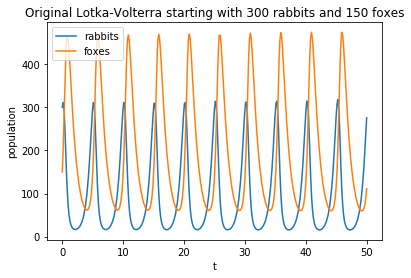

In [4]:
def lotka(t, y):
    """function to be integrated to solve the Lotka-Volterra equations
    Input:
      t is time (scalar)
      y is [rabbits(t), foxes(t)]
    Output:
      ydot is the vector dy/dt
    """
    alpha = .01
    ydot = [2*y[0] - alpha*y[0]*y[1],
             -y[1] + alpha*y[0]*y[1]  ]
    return ydot

tspan = (0,50)
rabbits_0 = 300
foxes_0   = 150
yinit = [rabbits_0, foxes_0]

sol = integrate.solve_ivp(fun = lotka, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], label = 'rabbits')
plt.plot(sol.t, sol.y[1], label = 'foxes')
plt.legend()
plt.xlabel('t')
plt.ylabel('population')
plt.title('Original Lotka-Volterra starting with %d rabbits and %d foxes' % (rabbits_0, foxes_0))

Text(0.5, 1.0, 'Original Lotka-Volterra fox versus rabit starting with 300 rabbits and 150 foex')

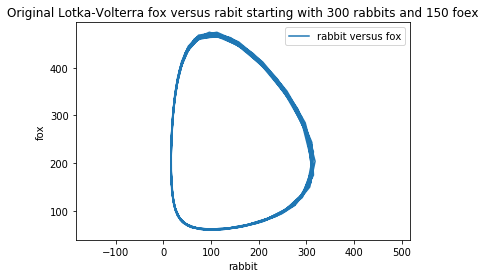

In [5]:
%matplotlib inline
plt.plot(sol.y[0], sol.y[1], label = "rabbit versus fox")
plt.legend()
plt.xlabel("rabbit")
plt.ylabel('fox')
plt.axis('equal')
#plt.gca().axis('equal')
plt.title('Original Lotka-Volterra fox versus rabit starting with %d rabbits and %d foex' % (rabbits_0, foxes_0))

Text(0.5, 1.0, 'modified Lotka-Volterra starting with 300 rabbits and 150 foxes')

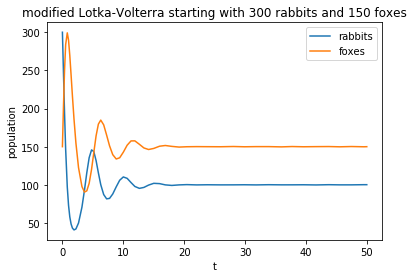

In [43]:
def lotka2(t, y):
    """function to be integrated to solve the Lotka-Volterra equations
    Input:
      t is time (scalar)
      y is [rabbits(t), foxes(t)]
    Output:
      ydot is the vector dy/dt
    """
    alpha = .01
    R = 400
    ydot = [2*(1-(y[0]/R))*y[0] - alpha*y[0]*y[1],
             -y[1] + alpha*y[0]*y[1]  ]
    return ydot

tspan = (0,50)
rabbits_0 = 300
foxes_0   = 150
yinit = [rabbits_0, foxes_0]

sol = integrate.solve_ivp(fun = lotka2, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], label = 'rabbits')
plt.plot(sol.t, sol.y[1], label = 'foxes')
plt.legend()
plt.xlabel('t')
plt.ylabel('population')
plt.title('modified Lotka-Volterra starting with %d rabbits and %d foxes' % (rabbits_0, foxes_0))

Text(0.5, 1.0, 'Modified Lotka-Volterra fox versus rabit starting with 300 rabbits and 150 foex')

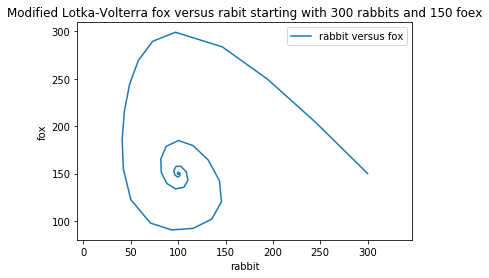

In [44]:
%matplotlib inline
plt.plot(sol.y[0], sol.y[1], label = "rabbit versus fox")
plt.legend()
plt.xlabel("rabbit")
plt.ylabel('fox')
plt.axis('equal')
plt.title('Modified Lotka-Volterra fox versus rabit starting with %d rabbits and %d foex' % (rabbits_0, foxes_0))

CPU times: user 13.4 ms, sys: 1.17 ms, total: 14.5 ms
Wall time: 13.4 ms
[ 1.          0.99999708  0.99964624  0.9979969   0.99500302  0.99066862
  0.98499954  0.97800343  0.96968971  0.96006959  0.94915601  0.9369637
  0.92350906  0.90881024  0.89288703  0.87576089  0.85745489  0.83799369
  0.81740351  0.7957121   0.77294867  0.7491439   0.72432986  0.69853997
  0.67180898  0.64417291  0.61566899  0.58633562  0.55621231  0.52533966
  0.49375925  0.46151363  0.42864625  0.39520138  0.36122408  0.32676013
  0.29185596  0.25655859  0.22091558  0.18497494  0.1487851   0.1123948
  0.07585309  0.03920919  0.00251246 -0.03418766 -0.07084172 -0.10740033
 -0.14381426 -0.18003444 -0.21601207 -0.25169868 -0.2870462  -0.322007
 -0.35653399 -0.39058064 -0.4241011  -0.45705019 -0.48938353 -0.52105757
 -0.55202962 -0.58225797 -0.61170188 -0.64032168 -0.66807883 -0.69493593
 -0.72085679 -0.74580649 -0.76975142 -0.79265932 -0.81449933 -0.83524202
 -0.85485944 -0.87332518 -0.89061435 -0.90670365 -0.921

Text(0.5, 1.0, "Newton's Motion x0 versus x1 with eccentricity 0.000000 with rtol = 1e-12")

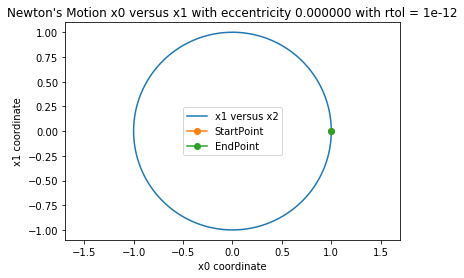

In [4]:
def Newton(t, y):
    """function to be integrated to solve the Newton's second law equations
    Input:
      t is time (scalar)
      y is [x0 coordinate(t), x0 velocity(t), x1 coordinate(t), x1 velocity(t)]
    Output:
      ydot is the vector dy/dt
    """
    ydot = [y[1],
            -y[0]/(y[0]**2+y[2]**2)**(3/2),
           y[3],
           -y[2]/(y[0]**2+y[2]**2)**(3/2)]
    return ydot
e = 0
tspan = (0,1*2*np.pi)
yinit = [1-e, 0, 0, math.sqrt((1+e)/(1-e))]
tol = -12
%time sol = integrate.solve_ivp(fun = Newton, t_span = tspan, y0 = yinit, method = 'RK23', rtol = 10**(tol))
FinalX = np.array([sol.y[0][-1],sol.y[2][-1]])
print(sol.y[0])
%matplotlib inline
plt.plot(sol.y[0], sol.y[2], label = 'x1 versus x2')
plt.plot(sol.y[0][0],sol.y[2][0], label = "StartPoint", marker = 'o')
plt.plot(sol.y[0][-1],sol.y[2][-1], label = "EndPoint", marker = 'o')
plt.legend()
plt.gca().axis('equal')
plt.xlabel('x0 coordinate')
plt.ylabel('x1 coordinate')
plt.title('Newton\'s Motion x0 versus x1 with eccentricity %f with rtol = 1e%i' % (e, tol))

Text(0.5, 1.0, 'Newton mothion of x0 starting with eccentricity 0.000000')

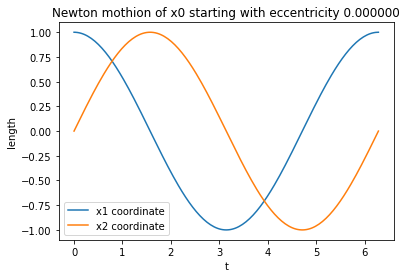

In [164]:
%matplotlib inline
plt.plot(sol.t, sol.y[0], label = 'x1 coordinate')
plt.plot(sol.t, sol.y[2], label = 'x2 coordinate')
plt.legend()
plt.xlabel('t')
plt.ylabel('length')
plt.title('Newton mothion of x0 starting with eccentricity %f' % e)

Text(0.5, 1.0, 'Newton mothion of x1 starting with eccentricity 0.990000')

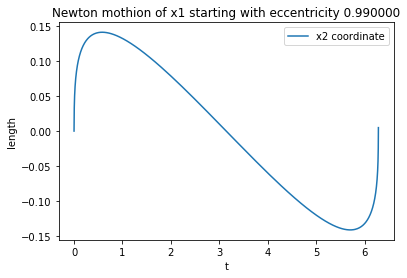

In [151]:
%matplotlib inline
#plt.plot(sol.t, sol.y[0], label = 'x1 coordinate')
plt.plot(sol.t, sol.y[2], label = 'x2 coordinate')
plt.legend()
plt.xlabel('t')
plt.ylabel('length')
plt.title('Newton mothion of x1 starting with eccentricity %f' % e)

Text(0.5, 1.0, "Newton's Motion x0 versus x1 with eccentricity 0.990000")

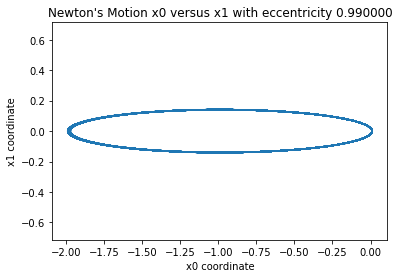

In [147]:
%matplotlib inline
plt.plot(sol.y[0], sol.y[2], label = 'x1 versus x2')
plt.gca().axis('equal')
plt.xlabel('x0 coordinate')
plt.ylabel('x1 coordinate')
plt.title('Newton\'s Motion x0 versus x1 with eccentricity %f' % e)

In [100]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The foll

In [165]:
18/46

0.391304347826087

[[0.00000000e+00 1.12837916e-04 1.24121658e-03 1.25244944e-02
  7.94348070e-02 1.99158028e-01 3.56018753e-01 5.35046285e-01
  7.22560647e-01 8.82200530e-01 9.60466814e-01 9.89297174e-01
  9.95213259e-01]]


Text(0.5, 1.0, 'sol_ivp comparewith erf')

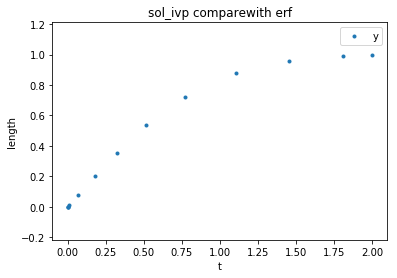

In [45]:
def erf(t, y):
    ydot = (2/np.sqrt(np.pi))*np.exp(-t**2)
    return ydot
yintit = [0]
tspan = (0, 2)
sol = integrate.solve_ivp(fun = erf, t_span = tspan, y0 = yintit, method = 'RK23')
print(sol.y)
%matplotlib inline
plt.plot(sol.t, sol.y[0], '.',label = 'y')
tt = np.linspace(0, 2, 20)
#plt.plot(tt, np.erf(tt), label = "erf")
#print(tt)
plt.gca().axis("equal")
#plt.gca().set_ylim(-0.1,0.1)
plt.legend()
plt.xlabel('t')
plt.ylabel('length')
plt.title('sol_ivp comparewith erf')

CPU times: user 6.2 ms, sys: 2.52 ms, total: 8.72 ms
Wall time: 6.43 ms
CPU times: user 11.4 ms, sys: 214 µs, total: 11.6 ms
Wall time: 11.5 ms
size of y: 61


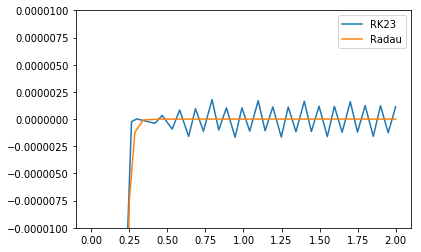

In [12]:
def func(t, y):
    ydot = -50*y
    return ydot
yi = [-2]
tspan = (0, 2)
%time sol1 = integrate.solve_ivp(fun = func, t_span = tspan, y0 = yi, method = 'RK23')
%time sol2 = integrate.solve_ivp(fun = func, t_span = tspan, y0 = yi, method = 'Radau')
print("size of y:",len(sol1.y[0]))
%matplotlib inline
plt.plot(sol1.t, sol1.y[0], label = 'RK23')
plt.plot(sol2.t, sol2.y[0], label = 'Radau')
plt.gca().set_ylim([-0.00001, 0.00001])
plt.legend()

In [28]:
2**10-1

1023

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>